# Running Sentiment Analysis on Illinois Tweets

Used Vader Sentiment Analysis to conduct sentiment analysis on all tweets. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Link to this Sentiment Analyzer: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [37]:
# Reading in Illinois data

il_df = pd.read_csv('./data/IL_full.csv', low_memory=False)

il_df.head(3)

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,...,hashtags,mentions,geo,urls,city,query,date_range,state,month,day
0,Ecookiemonster7,NaN,Went on a run with Lindsay this afternoon. Her...,1,6,0,1244772787648159744,https://twitter.com/Ecookiemonster7/status/124...,385748218,2020-03-30 23:45:33+00:00,...,#marriagegoals,NaN,NaN,NaN,springfield,get OR one OR time OR people OR day OR know OR...,"('2020-03-17', '2020-03-31')",IL,3.0,30.0
1,VirginiaVarner1,Education4Libs,"No, no, no! Keep up the good work! Every knock...",0,1,0,1244771861097046016,https://twitter.com/VirginiaVarner1/status/124...,1086116980602687488,2020-03-30 23:41:53+00:00,...,NaN,NaN,NaN,NaN,springfield,get OR one OR time OR people OR day OR know OR...,"('2020-03-17', '2020-03-31')",IL,3.0,30.0
2,VirginiaVarner1,1Romans58,"Aww but you forget, "" anything Trump is bad!"" ...",0,1,0,1244768605947990016,https://twitter.com/VirginiaVarner1/status/124...,1086116980602687488,2020-03-30 23:28:56+00:00,...,NaN,NaN,NaN,NaN,springfield,get OR one OR time OR people OR day OR know OR...,"('2020-03-17', '2020-03-31')",IL,3.0,30.0


In [48]:
# Initializing Vader model 
analyser = SentimentIntensityAnalyzer()

# provided from link 
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#     print("{:-<40} {}".format(sentence, str(score)))
    return score

In [50]:
il_df['sentiment_analysis'] = il_df.apply(lambda x: sentiment_analyzer_scores(x['text']), axis=1)

In [54]:
il_df['neg_score'] = il_df['sentiment_analysis'].apply(lambda x: x['neg'])
il_df['neu_score'] = il_df['sentiment_analysis'].apply(lambda x: x['neu'])
il_df['pos_score'] = il_df['sentiment_analysis'].apply(lambda x: x['pos'])
il_df['compound_score'] = il_df['sentiment_analysis'].apply(lambda x: x['compound'])

In [41]:
# Creating a function to run for each dataframe 

def vader_analyzer(data): 
    data['sentiment_analysis'] = data['text'].apply(sentiment_analyzer_scores)

In [42]:
# Function to break down scores into columns
def score_breakdown(data, data_col): 
    data['neg_score'] = data['sentiment_analysis'].apply(lambda x: x['neg'])
    data['neu_score'] = data['sentiment_analysis'].apply(lambda x: x['neu'])
    data['pos_score'] =data['sentiment_analysis'].apply(lambda x: x['pos'])
    data['compound_score'] = data['sentiment_analysis'].apply(lambda x: x['compound'])

In [43]:
# test_df = il_df.copy()[:10]
# vader_analyzer(test_df)

In [44]:
# il_df['sentiment_analysis'][0]

In [45]:
# test_df.head()

In [46]:
# Was taking forever to run, but when kernal is interrupted, all the columns exist with correct values
vader_analyzer(il_df)

KeyboardInterrupt: 

In [57]:
# Converting datetime 
il_df['datetime'] = pd.to_datetime(il_df['date'], format=('%Y-%m-%d'))

In [75]:
il_df['datetime'].dtype
il_df['month_day_hour'] = il_df['datetime'].dt.strftime(date_format="%m%d%H")

In [81]:
il_df['month_day'] = il_df['datetime'].dt.strftime(date_format="%m-%d")

In [ ]:
il_df.groupby('')

In [83]:
days = il_df['month_day'].unique()

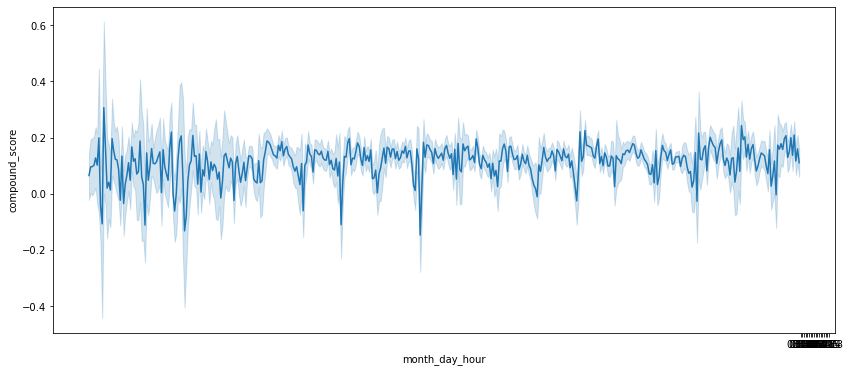

In [84]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=il_df, x='month_day_hour', y='compound_score')
plt.xticks(days, days);

In [59]:
il_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169093 entries, 0 to 169092
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   username            169093 non-null  object             
 1   to                  85400 non-null   object             
 2   text                169093 non-null  object             
 3   retweets            169093 non-null  int64              
 4   favorites           169093 non-null  int64              
 5   replies             169093 non-null  int64              
 6   id                  169093 non-null  int64              
 7   permalink           169093 non-null  object             
 8   author_id           169093 non-null  int64              
 9   date                169093 non-null  object             
 10  formatted_date      169093 non-null  object             
 11  hashtags            25352 non-null   object             
 12  mentions        